In [1]:
from fastai.vision.all import *
from pathlib import Path
import h5py
from matplotlib import cm

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_micro.hdf5'
classes = ["general", "W-boson"]
    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']

def label_func(x):
    signal = signal_data[int(x)]
    return classes[int(signal)]

def get_items(x):
    l = len(image_data)
    return [str(i) for i in range(l)]

def get_x(x):
    return torch.from_numpy(image_data[int(x)])


In [3]:
train_dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_items,
                   get_x = get_x,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=[Resize(64, method='squish')])

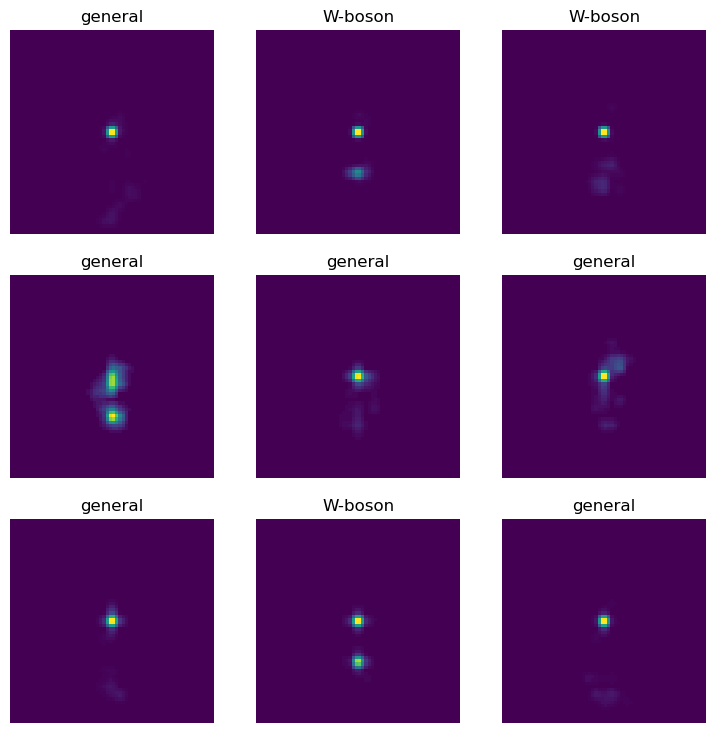

In [4]:
dls_train = train_dblock.dataloaders(path)
dls_train.show_batch()

In [5]:
def trainModel(dls,arch,amount):
    vision_learner(dls, arch, metrics = accuracy).fine_tune(amount)
    


In [6]:
trainModel(dls_train, "resnet18", 5)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.851329,0.635073,0.726075,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.600050,0.535267,0.759312,00:13
1,0.547369,0.495486,0.772493,00:14
2,0.483283,0.498553,0.773639,00:14
3,0.436405,0.496846,0.782235,00:13
4,0.395165,0.500500,0.780516,00:14


In [7]:
trainModel(dls_train, "resnet26", 5)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26-9aa10e23.pth" to /root/.cache/torch/hub/checkpoints/resnet26-9aa10e23.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.914479,0.695668,0.692837,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.568737,0.622920,0.725501,00:14
1,0.523130,0.555862,0.730659,00:14
2,0.472381,0.549618,0.745559,00:15
3,0.402622,0.546032,0.751862,00:14
4,0.334103,0.549563,0.757593,00:14


In [8]:
trainModel(dls_train, "resnet50", 5)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.077233,0.755986,0.653868,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.715458,0.682605,0.655587,00:16
1,0.660179,0.614037,0.667049,00:15
2,0.606365,0.594129,0.675645,00:16
3,0.590859,0.578144,0.691691,00:15
4,0.575113,0.571644,0.696848,00:16


In [9]:
trainModel(dls_train, "convnext_tiny", 5)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.811286,0.577118,0.754728,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.596094,0.559164,0.774785,00:16
1,0.545721,0.490331,0.789685,00:16
2,0.482176,0.485807,0.785100,00:16
3,0.446531,0.451565,0.805731,00:15
4,0.416602,0.453664,0.802865,00:16


In [10]:
trainModel(dls_train, "convnext_small", 5)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_1k_224_ema.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.828085,0.559006,0.756447,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.576495,0.512941,0.763897,00:22
1,0.540242,0.474174,0.791404,00:21
2,0.474351,0.452725,0.805731,00:21
3,0.454522,0.449376,0.802292,00:21
4,0.425652,0.448081,0.801719,00:21


In [11]:
trainModel(dls_train, "convnext_large", 5)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_large_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_large_1k_224_ema.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.795407,0.584971,0.754155,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.586113,0.507411,0.769628,00:36
1,0.538332,0.474541,0.776504,00:36
2,0.482130,0.470962,0.783954,00:36
3,0.443610,0.449060,0.794269,00:36
4,0.419228,0.445096,0.795989,00:36
